In [52]:
import os
import rasterio
from PIL import Image
from matplotlib import pyplot
# import cv2
import numpy as np
import pandas as pd

from rasterio.windows import Window


import glob
import pathlib
import csv




## Carregar Dataset Inteiro

 TIFF (Tagged Image File Format) é um formato de arquivo amplamente utilizado para armazenar imagens, especialmente em aplicações científicas e de engenharia.

### O que são imagens TIFF ou TIF? 

TIFF (Tagged Image File Format) é um formato de imagem popular que pode armazenar várias imagens ou quadros em um único arquivo. Cada quadro pode conter uma imagem diferente ou todas podem ser idênticas. Os arquivos TIFF também podem armazenar uma variedade de dados de imagem, incluindo profundidade de cor, compactação e resolução de imagem. Quando um arquivo TIFF contém vários quadros, ele geralmente é chamado de TIFF de várias páginas ou pilha TIFF. TIFFs de várias páginas são comumente usados ​​em imagens médicas, digitalização de documentos e outras aplicações onde um único arquivo precisa armazenar várias imagens ou páginas. Os quadros podem ser usados ​​para armazenar diferentes visualizações do mesmo objeto, diferentes fatias de uma imagem 3D ou diferentes páginas de um documento digitalizado.

In [2]:
# src = rasterio.open("PRE/Pre_Event_San_Juan.tiff")

In [3]:
# src

<open DatasetReader name='PRE/Pre_Event_San_Juan.tiff' mode='r'>

In [7]:
# src.name

'PRE/Pre_Event_San_Juan.tiff'

In [5]:
# array = src.read(1)

In [6]:
# array.shape

(74602, 38259)

## Split Method

O fato de precisar 32GB de RAM gerou a necessidade de dividir o dataset

In [8]:
def split_tif(file_path, output_path, window_size):
    with rasterio.open(file_path) as src:
        for i in range(0, src.height, window_size[1]):
            for j in range(0, src.width, window_size[0]):
                window = Window(j, i, window_size[0], window_size[1])
                transform = src.window_transform(window)
                profile = src.profile
                profile.update({
                    'height': window.height,
                    'width': window.width,
                    'transform': transform
                })
                output_file = f"{output_path}/split_{i}_{j}.tif"
                with rasterio.open(output_file, 'w', **profile) as dst:
                    dst.write(src.read(window=window))



## Split Dataset = Economizar Memória

In [9]:
# # Example usage
# file_path = 'PRE/Pre_Event_San_Juan.tiff'
# output_path = 'PRE_splitted/'
# window_size = (1000, 1000)  # Split into 1000x1000 tiles
# split_tif(file_path, output_path, window_size)


In [56]:
# file_path = 'PRE_splitted/split_0_1000.tif'
# file_path = 'PRE_splitted/split_0_35000.tif'
# file_path = 'PRE_splitted/split_3000_12000.tif'
file_path = 'PRE_splitted/split_21000_9000.tif'
src = rasterio.open(file_path)

In [57]:
src

<open DatasetReader name='PRE_splitted/split_21000_9000.tif' mode='r'>

In [58]:
array = src.read(1)

In [59]:
array.shape

(1000, 1000)

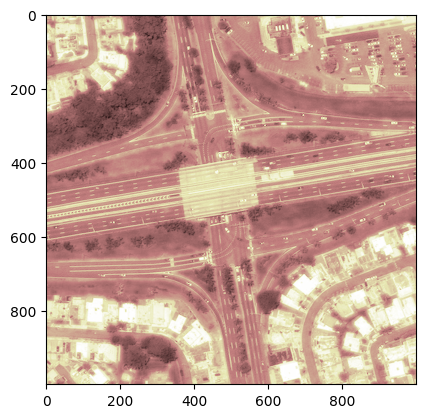

In [60]:
pyplot.imshow(array, cmap='pink')
pyplot.show()

# Extracting Metadata from TIFF

In [45]:
image = Image.open('PRE_splitted/split_21000_9000.tif')

   
# extract other basic metadata
info_dict = {
    "Filename": image.filename.split('/')[1],
    "Image Size": image.size,
    "Image Height": image.height,
    "Image Width": image.width,
    "Image Format": image.format,
    "Image Mode": image.mode,
    "Image is Animated": getattr(image, "is_animated", False),
    "Frames in Image": getattr(image, "n_frames", 1),
}

print(info_dict)


{'Filename': 'split_21000_9000.tif', 'Image Size': (1000, 1000), 'Image Height': 1000, 'Image Width': 1000, 'Image Format': 'TIFF', 'Image Mode': 'RGB', 'Image is Animated': False, 'Frames in Image': 1}


# Reading TIFF Images from a Directory

In [50]:
# # Create an empty list to store the image metadata
# metadata_list = []
# 
# # Search for TIFF image files in the directory
# for image_path in glob.glob("PRE_splitted/*.tif"):
#     # Open the image file
#     image = Image.open(image_path)
# 
#     # Extract basic metadata
#     image_size = image.size
#     image_height = image.height
#     image_width = image.width
#     image_format = image.format
#     image_mode = image.mode
#     image_is_animated = getattr(image, "is_animated", False)
#     frames_in_image = getattr(image, "n_frames", 1)
# 
#     # Create a dictionary to store the metadata
#     metadata = {
#         "filename": pathlib.Path(image_path).name,
#         "size": image_size,
#         "height": image_height,
#         "width": image_width,
#         "format": image_format,
#         "mode": image_mode,
#         "is_animated": image_is_animated,
#         "frames": frames_in_image,
#     }
# 
#     # Add the metadata dictionary to the list
#     metadata_list.append(metadata)
# 
# # Write the metadata list to a CSV file
# with open("metadata.csv", "w", newline="") as csv_file:
#     writer = csv.DictWriter(csv_file, fieldnames=metadata_list[0].keys())
#     writer.writeheader()
#     writer.writerows(metadata_list)

In [55]:

# Path to the CSV file
csv_file_path = 'metadata.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)

# Display the first few rows of the DataFrame to verify it's loaded correctly
print(df.head())


            filename          size  height  width format mode  is_animated  \
0      split_0_0.tif  (1000, 1000)    1000   1000   TIFF  RGB        False   
1   split_0_1000.tif  (1000, 1000)    1000   1000   TIFF  RGB        False   
2  split_0_10000.tif  (1000, 1000)    1000   1000   TIFF  RGB        False   
3  split_0_11000.tif  (1000, 1000)    1000   1000   TIFF  RGB        False   
4  split_0_12000.tif  (1000, 1000)    1000   1000   TIFF  RGB        False   

   frames  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
array.shape

In [ ]:
# for i, dtype, nodataval in zip(src.indexes, src.dtypes, src.nodatavals):
#     print(i, dtype, nodataval)

In [ ]:
# src

In [ ]:

# cv2_img = cv2.imread(path)

## Image Processing
